In [ ]:
import io
import os
import random
import shutil
import itertools
import numpy as np
import sklearn.metrics
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from datetime import datetime
from shutil import copyfile
from os import getcwd

from google.colab import drive
drive.mount('/content/drive')
print("TensorFlow version: ", tf.__version__)

Mounted at /content/drive
TensorFlow version:  2.12.0


#### Making Empty Folder in Drive

In [ ]:
root_dir = '/content/drive/MyDrive/ML/Coba Gills'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')


  train_busuk_dir = os.path.join(train_dir, 'busuk')
  train_kurang_segar_dir = os.path.join(train_dir, 'kurang_segar')
  train_segar_dir = os.path.join(train_dir, 'segar')
  os.makedirs(train_busuk_dir)
  os.makedirs(train_kurang_segar_dir)
  os.makedirs(train_segar_dir)

  
  validation_busuk_dir = os.path.join(validation_dir, 'busuk')
  validation_kurang_segar_dir = os.path.join(validation_dir, 'kurang_segar')
  validation_segar_dir = os.path.join(validation_dir, 'segar')
  os.makedirs(validation_busuk_dir)
  os.makedirs(validation_kurang_segar_dir)
  os.makedirs(validation_segar_dir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

#### Split and add the images

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  files = os.listdir(SOURCE_DIR)

  split = (len(files)*SPLIT_SIZE)

  #Randomize the file sample
  files = random.sample(files, len(files))

  train = files[:int(split)]
    
  
  for name in train:
    source = os.path.join(SOURCE_DIR, name)
    destination = os.path.join(TRAINING_DIR, name)
    if os.path.getsize(source)>0:
      copyfile(source, destination) 
    else:
      print(f"{name} is zero length, so ignoring.")


  valid = files[int(split):]
  
  for name in valid:
    source = os.path.join(SOURCE_DIR, name)
    destination = os.path.join(VALIDATION_DIR, name)
    if os.path.getsize(source)>0:
      copyfile(source, destination) 
    else:
      print(f"{name} is zero length, so ignoring.")

In [ ]:
# Define paths
TRAINING_DIR = "/content/drive/MyDrive/ML/Coba Gills/training"
VALIDATION_DIR = "/content/drive/MyDrive/ML/Coba Gills/validation"

SEGAR_DIR = "/content/drive/MyDrive/ML/Data_Augmented/Gills/Segar"
KURANG_SEGAR_DIR = "/content/drive/MyDrive/ML/Data_Augmented/Gills/Kurang Segar"
BUSUK_DIR = "/content/drive/MyDrive/ML/Data_Augmented/Gills/Tidak Segar"

TRAINING_SEGAR_DIR = os.path.join(TRAINING_DIR, "segar/")
VALIDATION_SEGAR_DIR = os.path.join(VALIDATION_DIR, "segar/")
TRAINING_KURANG_SEGAR_DIR = os.path.join(TRAINING_DIR, "kurang_segar/")
VALIDATION_KURANG_SEGAR_DIR = os.path.join(VALIDATION_DIR, "kurang_segar/")
TRAINING_BUSUK_DIR = os.path.join(TRAINING_DIR, "busuk/")
VALIDATION_BUSUK_DIR = os.path.join(VALIDATION_DIR, "busuk/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_SEGAR_DIR)) > 0:
  for file in os.scandir(TRAINING_SEGAR_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KURANG_SEGAR_DIR)) > 0:
  for file in os.scandir(TRAINING_KURANG_SEGAR_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BUSUK_DIR)) > 0:
  for file in os.scandir(TRAINING_BUSUK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_SEGAR_DIR)) > 0:
  for file in os.scandir(VALIDATION_SEGAR_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KURANG_SEGAR_DIR)) > 0:
  for file in os.scandir(VALIDATION_KURANG_SEGAR_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_BUSUK_DIR)) > 0:
  for file in os.scandir(VALIDATION_BUSUK_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .85

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(SEGAR_DIR, TRAINING_SEGAR_DIR, VALIDATION_SEGAR_DIR, split_size)
split_data(KURANG_SEGAR_DIR, TRAINING_KURANG_SEGAR_DIR, VALIDATION_KURANG_SEGAR_DIR, split_size)
split_data(BUSUK_DIR, TRAINING_BUSUK_DIR, VALIDATION_BUSUK_DIR, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original fresh directory has {len(os.listdir(SEGAR_DIR))} images")
print(f"Original less_fresh directory has {len(os.listdir(KURANG_SEGAR_DIR))} images")
print(f"Original spoiled directory has {len(os.listdir(BUSUK_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_SEGAR_DIR))} images of fresh fish for training")
print(f"There are {len(os.listdir(VALIDATION_SEGAR_DIR))} images of fresh fish for validation")
print(f"There are {len(os.listdir(TRAINING_KURANG_SEGAR_DIR))} images of less fresh fish for training")
print(f"There are {len(os.listdir(VALIDATION_KURANG_SEGAR_DIR))} images of less fresh fish for validation")
print(f"There are {len(os.listdir(TRAINING_BUSUK_DIR))} images of spoiled fish for training")
print(f"There are {len(os.listdir(VALIDATION_BUSUK_DIR))} images of spoiled fish for validation")

Original fresh directory has 670 images
Original less_fresh directory has 670 images
Original spoiled directory has 670 images

There are 569 images of fresh fish for training
There are 101 images of fresh fish for validation
There are 569 images of less fresh fish for training
There are 101 images of less fresh fish for validation
There are 569 images of spoiled fish for training
There are 101 images of spoiled fish for validation


# Train

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/ML/Coba Gills/training"
VALIDATION_DIR = "/content/drive/MyDrive/ML/Coba Gills/validation"

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/225,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode="categorical",
                                                      target_size=(224,224))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/225)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode="categorical",
                                                                target_size=(224,224))
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1707 images belonging to 3 classes.
Found 303 images belonging to 3 classes.


In [ ]:
train_generator.image_shape

(224, 224, 3)

In [ ]:
def create_mNet2(train_gen):

  pre_trained_model = tf.keras.applications.MobileNet(
    input_shape=train_gen.image_shape,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
    classifier_activation="softmax",
    )

  return pre_trained_model

In [ ]:
pre_trained_model = create_mNet2(train_generator)
pre_trained_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get("accuracy")>0.980 and logs.get("val_accuracy")>0.980):
      print("stop train!")
      self.model.stop_training=True

In [ ]:
#callbacks = myCallback()
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,epochs=25,verbose=1,validation_data=validation_generator)

Epoch 1/25
18/18 [==============================] - 250s 14s/step - loss: 2.0367 - accuracy: 0.4071 - val_loss: 1.4928 - val_accuracy: 0.4389
Epoch 2/25
18/18 [==============================] - 235s 13s/step - loss: 1.3095 - accuracy: 0.5507 - val_loss: 1.2806 - val_accuracy: 0.5314
Epoch 3/25
18/18 [==============================] - 246s 14s/step - loss: 0.9451 - accuracy: 0.6508 - val_loss: 1.0344 - val_accuracy: 0.6073
Epoch 4/25
18/18 [==============================] - 244s 14s/step - loss: 0.7202 - accuracy: 0.7417 - val_loss: 0.8832 - val_accuracy: 0.6733
Epoch 5/25
18/18 [==============================] - 241s 13s/step - loss: 0.5463 - accuracy: 0.7950 - val_loss: 0.7495 - val_accuracy: 0.7261
Epoch 6/25
18/18 [==============================] - 262s 15s/step - loss: 0.4511 - accuracy: 0.8389 - val_loss: 0.6350 - val_accuracy: 0.7558
Epoch 7/25
18/18 [==============================] - 253s 14s/step - loss: 0.3833 - accuracy: 0.8535 - val_loss: 0.5164 - val_accuracy: 0.8086
Epoch 

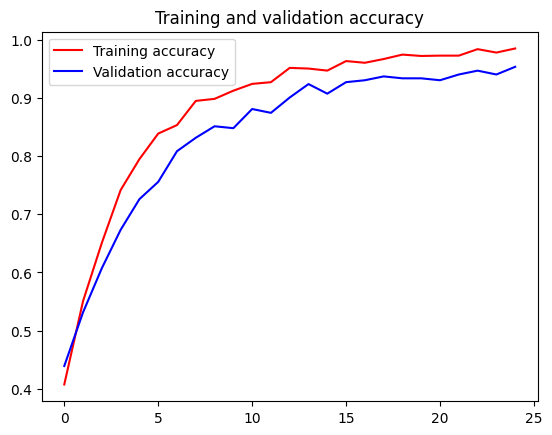

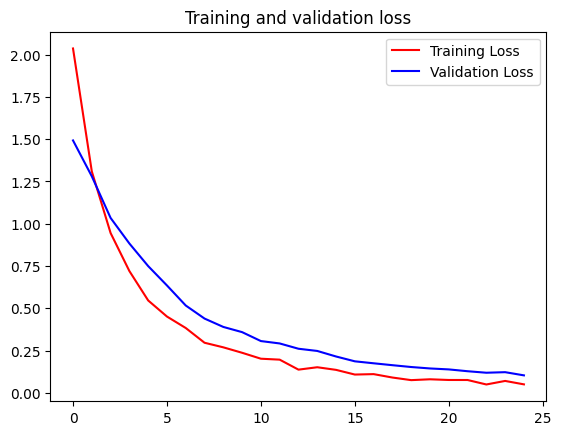

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save("/content/drive/MyDrive/ML/Model/Freshness/Gills(New).h5")

# Coba Modelnya

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array,image_dataset_from_directory

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/ML/Model/Freshness/Gills(New).h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/225)
test_generator = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/ML/Dataset/Gills",
                                                              batch_size=100,
                                                              class_mode="categorical",
                                                              target_size=(224,224))

Found 150 images belonging to 3 classes.


In [ ]:
model.evaluate(test_generator)

2/2 [==============================] - 15s 12s/step - loss: 0.0785 - accuracy: 0.9867


[0.07849422842264175, 0.9866666793823242]

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(224, 224))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images)

Saving 101.jpg to 101.jpg
1/1 [==============================] - 0s 44ms/step


In [ ]:
print(classes)

[[5.9468430e-01 4.0530381e-01 1.1819012e-05]]
